In [1]:
import os

dataset_path = "/home/joey/CIDAUT/"

# current_file_path = os.getcwd()
# working_directory = current_file_path.split("/")[-1]
# print(f"Current file path: {working_directory}")

def list_files(directory):
    for dirname, _, filenames in os.walk(directory):
        print(f"Directory: {dirname}")
        for filename in filenames:
            print(f"  - {filename}")

print("Listing all files and directories in the working directory:")
list_files(dataset_path)

test_directory = os.path.join(dataset_path, "Test")
print(test_directory)
if os.path.exists(test_directory):
    print("\nFiles in the 'Test' directory:")
    list_files(test_directory)
else:
    print("\n'Test' directory does not exist.")

train_directory = os.path.join(dataset_path, "Train")
train_fake_directory = os.path.join(dataset_path, "Train_visualization", "Fake")
train_real_directory = os.path.join(dataset_path, "Train_visualization", "Real")

if os.path.exists(train_fake_directory):
    print("\nFiles in the 'Train/Fake' directory:")
    list_files(train_fake_directory)
else:
    print("\n'Train/Fake' directory does not exist.")

if os.path.exists(train_real_directory):
    print("\nFiles in the 'Train/Real' directory:")
    list_files(train_real_directory)
else:
    print("\n'Train/Real' directory does not exist.")


Listing all files and directories in the working directory:
Directory: /home/joey/CIDAUT/
  - temp_ela_image.jpg
  - cidaut_code.ipynb
  - resnet50_training1.pth
  - first_submission_ty.csv
  - training1.py
  - sample_submission.csv
  - README.md
  - image_rgb_means.csv
  - preprocess_data_for_training.py
  - evaluation_code.py
  - train.csv
  - transform_train_real_fake.py
  - requirements.txt
Directory: /home/joey/CIDAUT/Val_CNN
Directory: /home/joey/CIDAUT/Val_CNN/Fake
  - 359.jpg
  - 781.jpg
  - 892.jpg
  - 414.jpg
  - 293.jpg
  - 893.jpg
  - 787.jpg
  - 814.jpg
  - 812.jpg
  - 535.jpg
  - 615.jpg
  - 179.jpg
  - 507.jpg
  - 820.jpg
  - 898.jpg
  - 628.jpg
  - 256.jpg
  - 756.jpg
  - 504.jpg
  - 895.jpg
  - 511.jpg
  - 441.jpg
  - 760.jpg
  - 539.jpg
  - 625.jpg
  - 434.jpg
  - 723.jpg
  - 823.jpg
  - 891.jpg
  - 677.jpg
  - 563.jpg
  - 107.jpg
  - 154.jpg
  - 549.jpg
  - 164.jpg
  - 461.jpg
  - 649.jpg
  - 165.jpg
  - 650.jpg
  - 347.jpg
  - 720.jpg
  - 271.jpg
  - 708.jpg
  - 684

In [2]:
n_train = len(os.listdir(os.path.join(dataset_path, 'Train')))
n_test = len(os.listdir(os.path.join(dataset_path, 'Test')))

print(f"Number of train samples: {n_train}")
print(f"Number of test samples: {n_test}")

Number of train samples: 720
Number of test samples: 180


In [3]:
import pandas as pd


sample_submission_df = pd.read_csv(os.path.join(dataset_path, 'sample_submission.csv'))
sample_submission_df.head()
sample_submission_df.groupby(['label']).size()/len(sample_submission_df)*100

label
0    48.888889
1    51.111111
dtype: float64

In [4]:
train_csv = pd.read_csv(os.path.join(dataset_path, 'train.csv'))
train_csv.head()
train_csv.groupby(['label']).size()/len(train_csv)*100

label
editada    43.75
real       56.25
dtype: float64

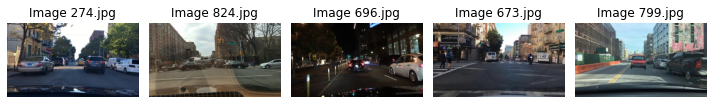

In [5]:
### show images from dataset

import os
from matplotlib import pyplot as plt
from PIL import Image

image_paths = []

for dirname, _, filenames in os.walk(test_directory):
    for filename in filenames:
        if filename.lower().endswith((".png", ".jpg", ".jpeg")):
            image_paths.append(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk(train_directory):
    for filename in filenames:
        if filename.lower().endswith((".png", ".jpg", ".jpeg")):
            image_paths.append(os.path.join(dirname, filename))

fig, axes = plt.subplots(1, 5, figsize=(10, 5))

for i, path in enumerate(image_paths[:5]):
    image = Image.open(path)
    axes[i].imshow(image)
    axes[i].axis("off")
    axes[i].set_title(f"Image {path.split('/')[-1]}")

plt.tight_layout()
plt.show()

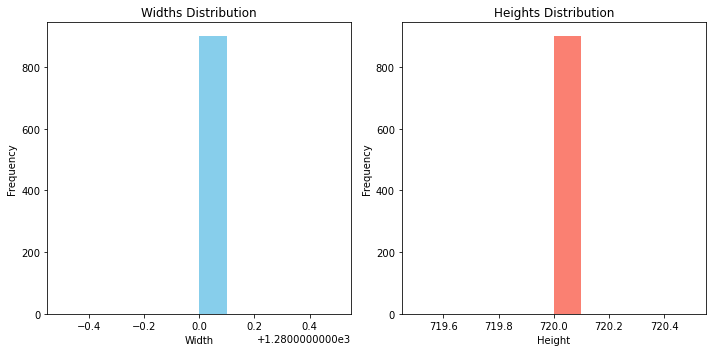

In [6]:
### get images dimensions

image_dimensions = [Image.open(path).size for path in image_paths]

widths, heights = zip(*image_dimensions)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].hist(widths, bins=10, color="skyblue")  
ax[0].set_title("Widths Distribution")
ax[0].set_xlabel("Width")
ax[0].set_ylabel("Frequency")

ax[1].hist(heights, bins=10, color="salmon")
ax[1].set_title("Heights Distribution")
ax[1].set_xlabel("Height")
ax[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

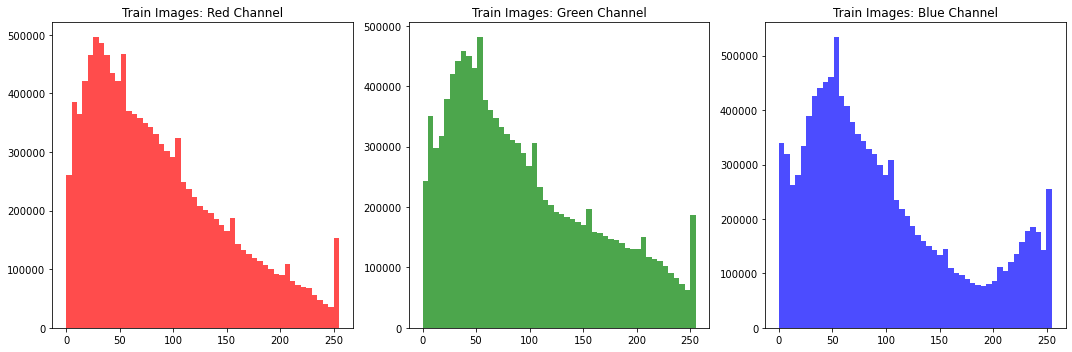

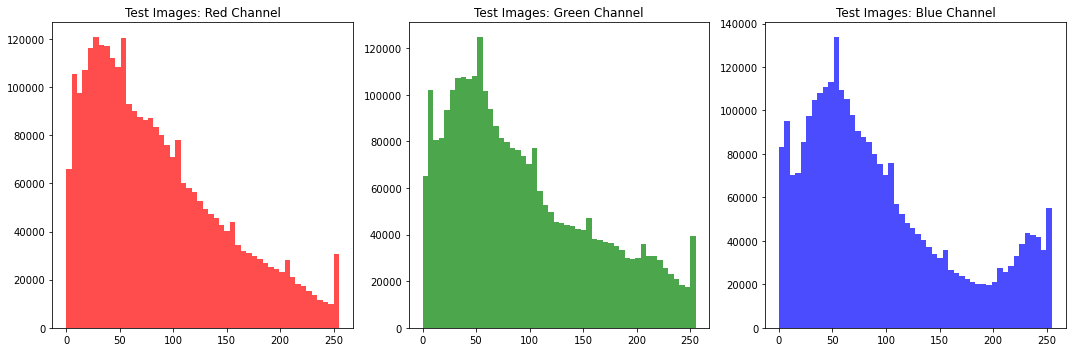

In [7]:
### see RGB distribution of train and test images

import numpy as np

train_image_paths = []
test_image_paths = []

for dirname, _, filenames in os.walk(train_directory):
    for filename in filenames:
        if filename.lower().endswith((".png", ".jpg", ".jpeg")):
            train_image_paths.append(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk(test_directory):
    for filename in filenames:
        if filename.lower().endswith((".png", ".jpg", ".jpeg")):
            test_image_paths.append(os.path.join(dirname, filename))

def get_rgb_distribution(image_paths, resize_to = (128,128)):
    reds = []
    greens = []
    blues = []
    for path in image_paths:
        image = Image.open(path).convert("RGB")
        image = image.resize(resize_to)
        image_array = np.array(image)
        reds.extend(image_array[:, :, 0].flatten())
        greens.extend(image_array[:, :, 1].flatten())
        blues.extend(image_array[:, :, 2].flatten())
    return reds, greens, blues

train_reds, train_greens, train_blues = get_rgb_distribution(train_image_paths)
test_reds, test_greens, test_blues = get_rgb_distribution(test_image_paths)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].hist(train_reds, bins=50, color='red', alpha=0.7)
axes[0].set_title('Train Images: Red Channel')
axes[1].hist(train_greens, bins=50, color='green', alpha=0.7)
axes[1].set_title('Train Images: Green Channel')
axes[2].hist(train_blues, bins=50, color='blue', alpha=0.7)
axes[2].set_title('Train Images: Blue Channel')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].hist(test_reds, bins=50, color='red', alpha=0.7)
axes[0].set_title('Test Images: Red Channel')
axes[1].hist(test_greens, bins=50, color='green', alpha=0.7)
axes[1].set_title('Test Images: Green Channel')
axes[2].hist(test_blues, bins=50, color='blue', alpha=0.7)
axes[2].set_title('Test Images: Blue Channel')
plt.tight_layout()
plt.show()

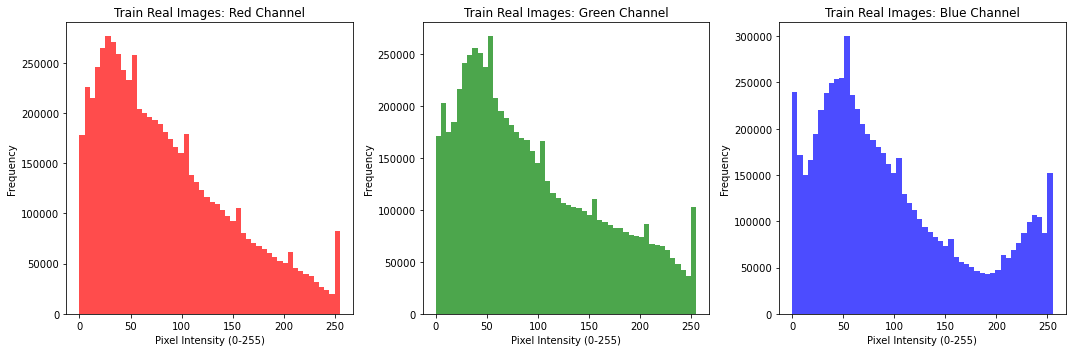

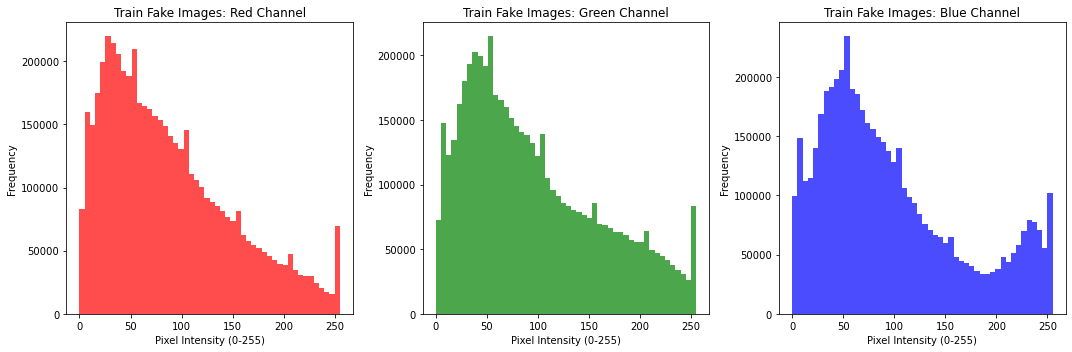

In [8]:
### see RGB distribution of train real and fake images

import numpy as np

train_real_image_paths = []
train_fake_image_paths = []

for dirname, _, filenames in os.walk(train_real_directory):
    for filename in filenames:
        if filename.lower().endswith((".png", ".jpg", ".jpeg")):
            train_real_image_paths.append(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk(train_fake_directory):
    for filename in filenames:
        if filename.lower().endswith((".png", ".jpg", ".jpeg")):
            train_fake_image_paths.append(os.path.join(dirname, filename))

def get_rgb_distribution(image_paths, resize_to = (128,128)):
    reds = []
    greens = []
    blues = []
    for path in image_paths:
        image = Image.open(path).convert("RGB")
        image = image.resize(resize_to)
        image_array = np.array(image)
        reds.extend(image_array[:, :, 0].flatten())
        greens.extend(image_array[:, :, 1].flatten())
        blues.extend(image_array[:, :, 2].flatten())
    return reds, greens, blues

train_reds, train_greens, train_blues = get_rgb_distribution(train_real_image_paths)
test_reds, test_greens, test_blues = get_rgb_distribution(train_fake_image_paths)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(train_reds, bins=50, color='red', alpha=0.7)
axes[0].set_title('Train Real Images: Red Channel')
axes[0].set_xlabel('Pixel Intensity (0-255)')
axes[0].set_ylabel('Frequency')

axes[1].hist(train_greens, bins=50, color='green', alpha=0.7)
axes[1].set_title('Train Real Images: Green Channel')
axes[1].set_xlabel('Pixel Intensity (0-255)')
axes[1].set_ylabel('Frequency')

axes[2].hist(train_blues, bins=50, color='blue', alpha=0.7)
axes[2].set_title('Train Real Images: Blue Channel')
axes[2].set_xlabel('Pixel Intensity (0-255)')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(test_reds, bins=50, color='red', alpha=0.7)
axes[0].set_title('Train Fake Images: Red Channel')
axes[0].set_xlabel('Pixel Intensity (0-255)')
axes[0].set_ylabel('Frequency')

axes[1].hist(test_greens, bins=50, color='green', alpha=0.7)
axes[1].set_title('Train Fake Images: Green Channel')
axes[1].set_xlabel('Pixel Intensity (0-255)')
axes[1].set_ylabel('Frequency')

axes[2].hist(test_blues, bins=50, color='blue', alpha=0.7)
axes[2].set_title('Train Fake Images: Blue Channel')
axes[2].set_xlabel('Pixel Intensity (0-255)')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [9]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

# # Replace these with the directories of your real and fake images
# train_real_directory = "path_to_real_images"
# train_fake_directory = "path_to_fake_images"

# train_real_image_paths = []
# train_fake_image_paths = []

# Gather image paths
for dirname, _, filenames in os.walk(train_real_directory):
    for filename in filenames:
        if filename.lower().endswith((".png", ".jpg", ".jpeg")):
            train_real_image_paths.append(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk(train_fake_directory):
    for filename in filenames:
        if filename.lower().endswith((".png", ".jpg", ".jpeg")):
            train_fake_image_paths.append(os.path.join(dirname, filename))


def calculate_rgb_means(image_paths, resize_to=(128, 128)):
    """Calculate mean RGB intensities for each image."""
    data = []
    for path in image_paths:
        image = Image.open(path).convert("RGB")
        image = image.resize(resize_to)
        image_array = np.array(image)
        
        # Calculate mean intensities for each channel
        mean_red = np.mean(image_array[:, :, 0])
        mean_green = np.mean(image_array[:, :, 1])
        mean_blue = np.mean(image_array[:, :, 2])
        
        data.append({
            "Image": os.path.basename(path),
            "Red Mean": mean_red,
            "Green Mean": mean_green,
            "Blue Mean": mean_blue
        })
    return pd.DataFrame(data)


# Calculate RGB means for real and fake images
real_image_data = calculate_rgb_means(train_real_image_paths)
fake_image_data = calculate_rgb_means(train_fake_image_paths)

# Combine into a single DataFrame with labels
real_image_data["Label"] = "Real"
fake_image_data["Label"] = "Fake"
all_image_data = pd.concat([real_image_data, fake_image_data], ignore_index=True)

# Save to a CSV file for further analysis
output_path = "image_rgb_means.csv"
all_image_data.to_csv(output_path, index=False)

print(f"Data saved to {output_path}")

# Display first few rows of the DataFrame
print(all_image_data.head())


Data saved to image_rgb_means.csv
     Image    Red Mean  Green Mean   Blue Mean Label
0  540.jpg  104.516357  105.825134  109.353394  Real
1  373.jpg   85.810669   92.471863   86.427307  Real
2  560.jpg  101.046021  102.979065   95.521362  Real
3  637.jpg   38.591614   33.151062   28.772583  Real
4  833.jpg   75.825134   88.972290   88.197205  Real


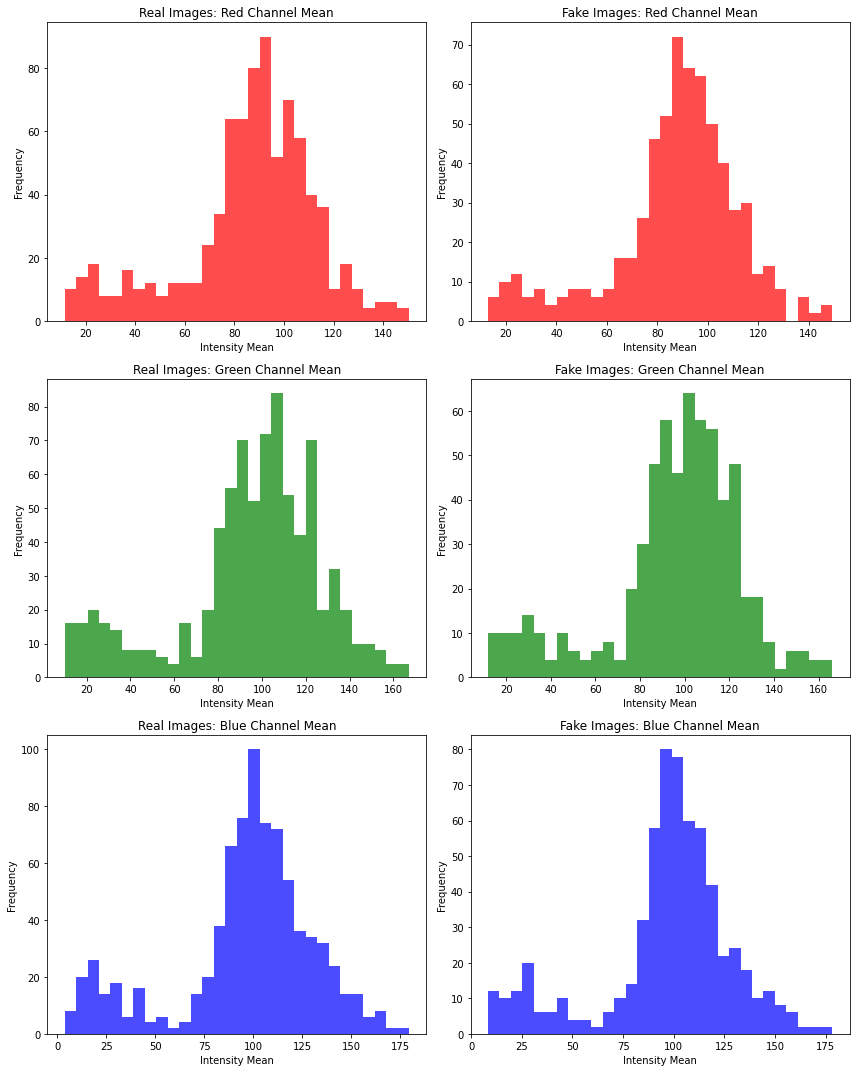

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Reload the data after execution state reset
data_path = "image_rgb_means.csv"
image_data = pd.read_csv(data_path)

# Separate real and fake image data
real_images = image_data[image_data["Label"] == "Real"]
fake_images = image_data[image_data["Label"] == "Fake"]

# Plot histograms for each RGB mean column
fig, axes = plt.subplots(3, 2, figsize=(12, 15))
columns = ["Red Mean", "Green Mean", "Blue Mean"]
colors = ["red", "green", "blue"]
titles = ["Red Channel Mean", "Green Channel Mean", "Blue Channel Mean"]

for i, (column, color, title) in enumerate(zip(columns, colors, titles)):
    # Real images
    axes[i, 0].hist(real_images[column], bins=30, color=color, alpha=0.7)
    axes[i, 0].set_title(f"Real Images: {title}")
    axes[i, 0].set_xlabel("Intensity Mean")
    axes[i, 0].set_ylabel("Frequency")
    
    # Fake images
    axes[i, 1].hist(fake_images[column], bins=30, color=color, alpha=0.7)
    axes[i, 1].set_title(f"Fake Images: {title}")
    axes[i, 1].set_xlabel("Intensity Mean")
    axes[i, 1].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()


In [11]:
print(train_real_image_paths)

['/home/joey/CIDAUT/Train_visualization/Real/540.jpg', '/home/joey/CIDAUT/Train_visualization/Real/373.jpg', '/home/joey/CIDAUT/Train_visualization/Real/560.jpg', '/home/joey/CIDAUT/Train_visualization/Real/637.jpg', '/home/joey/CIDAUT/Train_visualization/Real/833.jpg', '/home/joey/CIDAUT/Train_visualization/Real/60.jpg', '/home/joey/CIDAUT/Train_visualization/Real/486.jpg', '/home/joey/CIDAUT/Train_visualization/Real/174.jpg', '/home/joey/CIDAUT/Train_visualization/Real/771.jpg', '/home/joey/CIDAUT/Train_visualization/Real/66.jpg', '/home/joey/CIDAUT/Train_visualization/Real/844.jpg', '/home/joey/CIDAUT/Train_visualization/Real/777.jpg', '/home/joey/CIDAUT/Train_visualization/Real/177.jpg', '/home/joey/CIDAUT/Train_visualization/Real/436.jpg', '/home/joey/CIDAUT/Train_visualization/Real/16.jpg', '/home/joey/CIDAUT/Train_visualization/Real/245.jpg', '/home/joey/CIDAUT/Train_visualization/Real/214.jpg', '/home/joey/CIDAUT/Train_visualization/Real/476.jpg', '/home/joey/CIDAUT/Train_visua

Processing image: /home/joey/CIDAUT/Train_visualization/Real/540.jpg
Blurriness Score (Variance of Laplacian): 300.00540251969227
The image is not blurred.


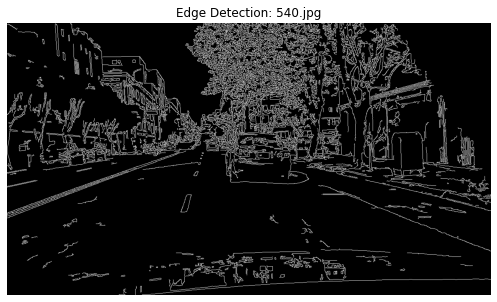

Processing image: /home/joey/CIDAUT/Train_visualization/Real/373.jpg
Blurriness Score (Variance of Laplacian): 308.8652700372378
The image is not blurred.


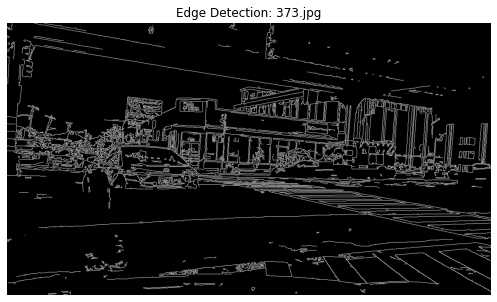

Processing image: /home/joey/CIDAUT/Train_visualization/Real/560.jpg
Blurriness Score (Variance of Laplacian): 222.50820088476482
The image is not blurred.


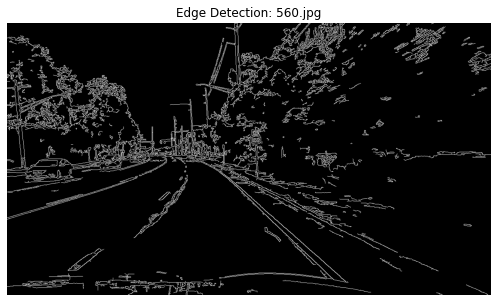

Processing image: /home/joey/CIDAUT/Train_visualization/Real/637.jpg
Blurriness Score (Variance of Laplacian): 38.83388989497878
The image is likely blurred.


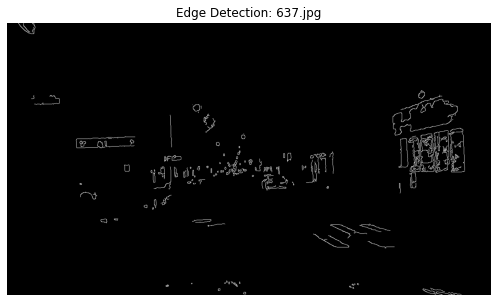

Processing image: /home/joey/CIDAUT/Train_visualization/Real/833.jpg
Blurriness Score (Variance of Laplacian): 1032.1065079526363
The image is not blurred.


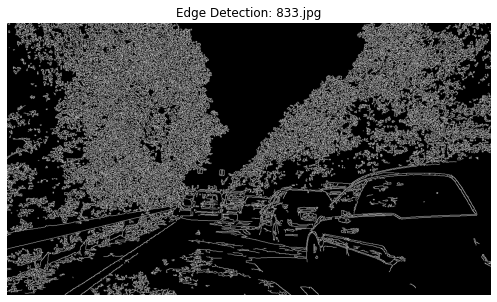

In [12]:
import cv2

def detect_blurriness(image_path):
    """Detect the blurriness of an image using the variance of the Laplacian."""
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale
    if image is None:
        print(f"Error: Could not read image at {image_path}")
        return None
    laplacian_var = cv2.Laplacian(image, cv2.CV_64F).var()
    return laplacian_var

def detect_edges(image_path):
    """Detect edges using the Canny edge detector."""
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale
    if image is None:
        print(f"Error: Could not read image at {image_path}")
        return None
    edges = cv2.Canny(image, threshold1=50, threshold2=150)  # Apply Canny edge detection
    return edges

# Process all images in train_real_image_paths
for image_path in train_real_image_paths[:5]:  # Limit to the first 5 images for demonstration
    print(f"Processing image: {image_path}")
    
    # Detect blurriness
    blurriness = detect_blurriness(image_path)
    if blurriness is not None:
        print(f"Blurriness Score (Variance of Laplacian): {blurriness}")
        if blurriness < 100:  # Threshold for blurriness
            print("The image is likely blurred.")
        else:
            print("The image is not blurred.")
    
    # Detect edges
    edges = detect_edges(image_path)
    if edges is not None:
        # Show the edges
        plt.figure(figsize=(10, 5))
        plt.imshow(edges, cmap="gray")
        plt.title(f"Edge Detection: {image_path.split('/')[-1]}")
        plt.axis("off")
        plt.show()


Processing image: /home/joey/CIDAUT/Train_visualization/Fake/129.jpg
Blurriness Score (Variance of Laplacian): 67.85750323180093
The image is likely blurred.


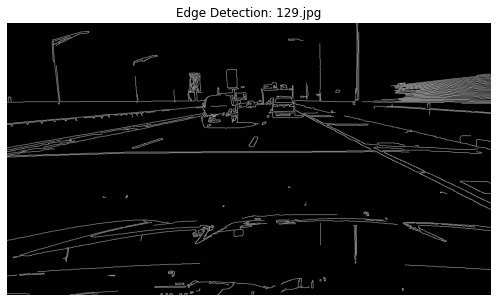

Processing image: /home/joey/CIDAUT/Train_visualization/Fake/688.jpg
Blurriness Score (Variance of Laplacian): 170.45481937180506
The image is not blurred.


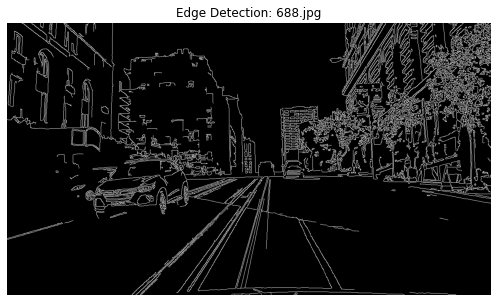

Processing image: /home/joey/CIDAUT/Train_visualization/Fake/182.jpg
Blurriness Score (Variance of Laplacian): 203.58748805063033
The image is not blurred.


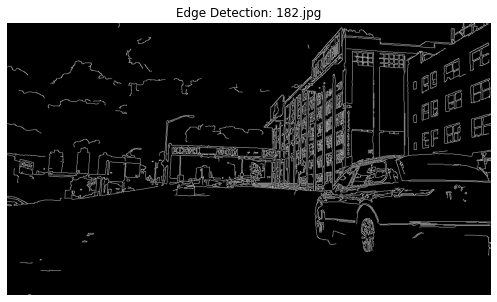

Processing image: /home/joey/CIDAUT/Train_visualization/Fake/359.jpg
Blurriness Score (Variance of Laplacian): 126.90873678700014
The image is not blurred.


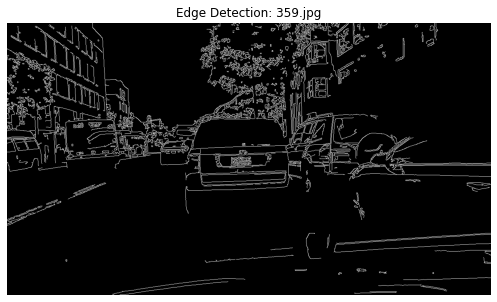

Processing image: /home/joey/CIDAUT/Train_visualization/Fake/877.jpg
Blurriness Score (Variance of Laplacian): 16.7033040358355
The image is likely blurred.


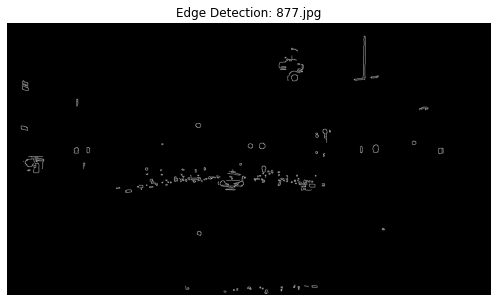

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def detect_blurriness(image_path):
    """Detect the blurriness of an image using the variance of the Laplacian."""
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale
    if image is None:
        print(f"Error: Could not read image at {image_path}")
        return None
    laplacian_var = cv2.Laplacian(image, cv2.CV_64F).var()
    return laplacian_var

def detect_edges(image_path):
    """Detect edges using the Canny edge detector."""
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale
    if image is None:
        print(f"Error: Could not read image at {image_path}")
        return None
    edges = cv2.Canny(image, threshold1=50, threshold2=150)  # Apply Canny edge detection
    return edges

# Process all images in train_fake_image_paths
for image_path in train_fake_image_paths[:5]:  # Limit to the first 5 images for demonstration
    print(f"Processing image: {image_path}")
    
    # Detect blurriness
    blurriness = detect_blurriness(image_path)
    if blurriness is not None:
        print(f"Blurriness Score (Variance of Laplacian): {blurriness}")
        if blurriness < 100:  # Threshold for blurriness
            print("The image is likely blurred.")
        else:
            print("The image is not blurred.")
    
    # Detect edges
    edges = detect_edges(image_path)
    if edges is not None:
        # Show the edges
        plt.figure(figsize=(10, 5))
        plt.imshow(edges, cmap="gray")
        plt.title(f"Edge Detection: {image_path.split('/')[-1]}")
        plt.axis("off")
        plt.show()


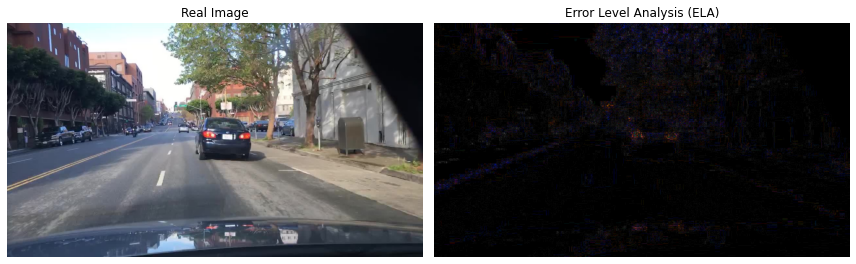

In [14]:
from PIL import Image, ImageChops, ImageEnhance
import matplotlib.pyplot as plt
import os

def perform_ela(image_path, quality=90):
    """
    Perform Error Level Analysis (ELA) on an image.
    Args:
        image_path (str): Path to the input image.
        quality (int): Compression quality for ELA (default: 90).
    Returns:
        ela_image (PIL.Image): The ELA image highlighting possible manipulations.
    """
    try:
        # Open the image
        original = Image.open(image_path)
        
        # Save the image at the specified quality level
        compressed_path = "temp_compressed.jpg"
        original.save(compressed_path, "JPEG", quality=quality)
        
        # Open the compressed image
        compressed = Image.open(compressed_path)
        
        # Perform Error Level Analysis (ELA)
        ela_image = ImageChops.difference(original, compressed)
        
        # Enhance differences for better visualization
        extrema = ela_image.getextrema()
        max_diff = max([ex[1] for ex in extrema])
        scale = 255.0 / max_diff
        ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
        
        # Remove temporary compressed file
        os.remove(compressed_path)
        
        return ela_image
    except Exception as e:
        print(f"Error performing ELA on {image_path}: {e}")
        return None

# Apply ELA to an image
image_path = train_real_image_paths[0]  # Use the first image as an example
ela_result = perform_ela(image_path)

if ela_result:
    # Show the original and ELA images
    original_image = Image.open(image_path)
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title("Real Image")
    plt.imshow(original_image)
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.title("Error Level Analysis (ELA)")
    plt.imshow(ela_result)
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()


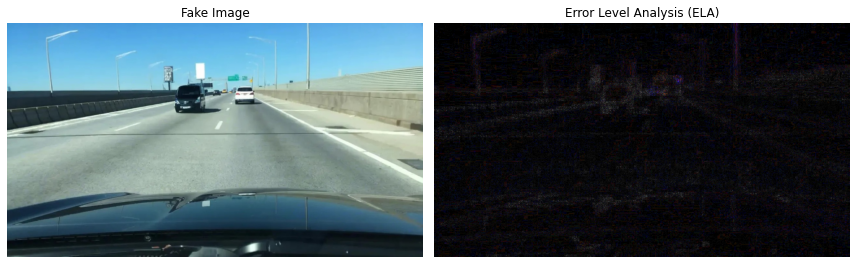

In [15]:
from PIL import Image, ImageChops, ImageEnhance
import matplotlib.pyplot as plt
import os

def perform_ela(image_path, quality=90):
    """
    Perform Error Level Analysis (ELA) on an image.
    Args:
        image_path (str): Path to the input image.
        quality (int): Compression quality for ELA (default: 90).
    Returns:
        ela_image (PIL.Image): The ELA image highlighting possible manipulations.
    """
    try:
        # Open the image
        original = Image.open(image_path)
        
        # Save the image at the specified quality level
        compressed_path = "temp_compressed.jpg"
        original.save(compressed_path, "JPEG", quality=quality)
        
        # Open the compressed image
        compressed = Image.open(compressed_path)
        
        # Perform Error Level Analysis (ELA)
        ela_image = ImageChops.difference(original, compressed)
        
        # Enhance differences for better visualization
        extrema = ela_image.getextrema()
        max_diff = max([ex[1] for ex in extrema])
        scale = 255.0 / max_diff
        ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
        
        # Remove temporary compressed file
        os.remove(compressed_path)
        
        return ela_image
    except Exception as e:
        print(f"Error performing ELA on {image_path}: {e}")
        return None

# Apply ELA to an image
image_path = train_fake_image_paths[0]  # Use the first image as an example
ela_result = perform_ela(image_path)

if ela_result:
    # Show the original and ELA images
    original_image = Image.open(image_path)
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title("Fake Image")
    plt.imshow(original_image)
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.title("Error Level Analysis (ELA)")
    plt.imshow(ela_result)
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Real Image ELA Statistics:
Mean: 0.1102701798081398
Variance: 0.19118204712867737
Standard Deviation: 0.4372437000274658

Fake Image ELA Statistics:
Mean: 0.05809389427304268
Variance: 0.0716380774974823
Standard Deviation: 0.2676528990268707


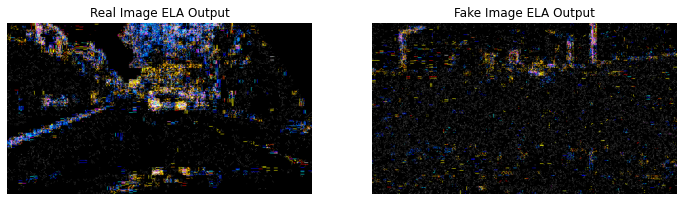

In [16]:
import cv2
import numpy as np
from PIL import Image, ImageChops
import matplotlib.pyplot as plt

def calculate_ela_statistics(image_path):
    """
    Perform ELA analysis and calculate statistical properties of the ELA output.
    """
    # Open the original image and save it with reduced quality
    original = Image.open(image_path).convert("RGB")
    temp_path = "temp_ela_image.jpg"
    original.save(temp_path, "JPEG", quality=95)  # Lower quality for ELA

    # Open the recompressed image and compute ELA
    recompressed = Image.open(temp_path)
    ela_image = ImageChops.difference(original, recompressed)
    ela_array = np.asarray(ela_image, dtype=np.float32)

    # Calculate statistics
    mean = np.mean(ela_array)
    variance = np.var(ela_array)
    std_dev = np.std(ela_array)
    return mean, variance, std_dev, ela_array

# Example: Analyze a real image
real_image_path = train_real_image_paths[0]  
real_mean, real_var, real_std, real_ela_array = calculate_ela_statistics(real_image_path)

# Example: Analyze a fake image
fake_image_path = train_fake_image_paths[0]  
fake_mean, fake_var, fake_std, fake_ela_array = calculate_ela_statistics(fake_image_path)

# Print statistics
print(f"Real Image ELA Statistics:\nMean: {real_mean}\nVariance: {real_var}\nStandard Deviation: {real_std}")
print()
print(f"Fake Image ELA Statistics:\nMean: {fake_mean}\nVariance: {fake_var}\nStandard Deviation: {fake_std}")

# Visualize ELA outputs
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# axes[0].imshow(real_ela_array / 255.0, cmap="gray")
axes[0].imshow(real_ela_array)
axes[0].set_title("Real Image ELA Output")
# axes[1].imshow(fake_ela_array / 255.0, cmap="gray")
axes[1].imshow(fake_ela_array)
axes[1].set_title("Fake Image ELA Output")
for ax in axes:
    ax.axis("off")
plt.show()


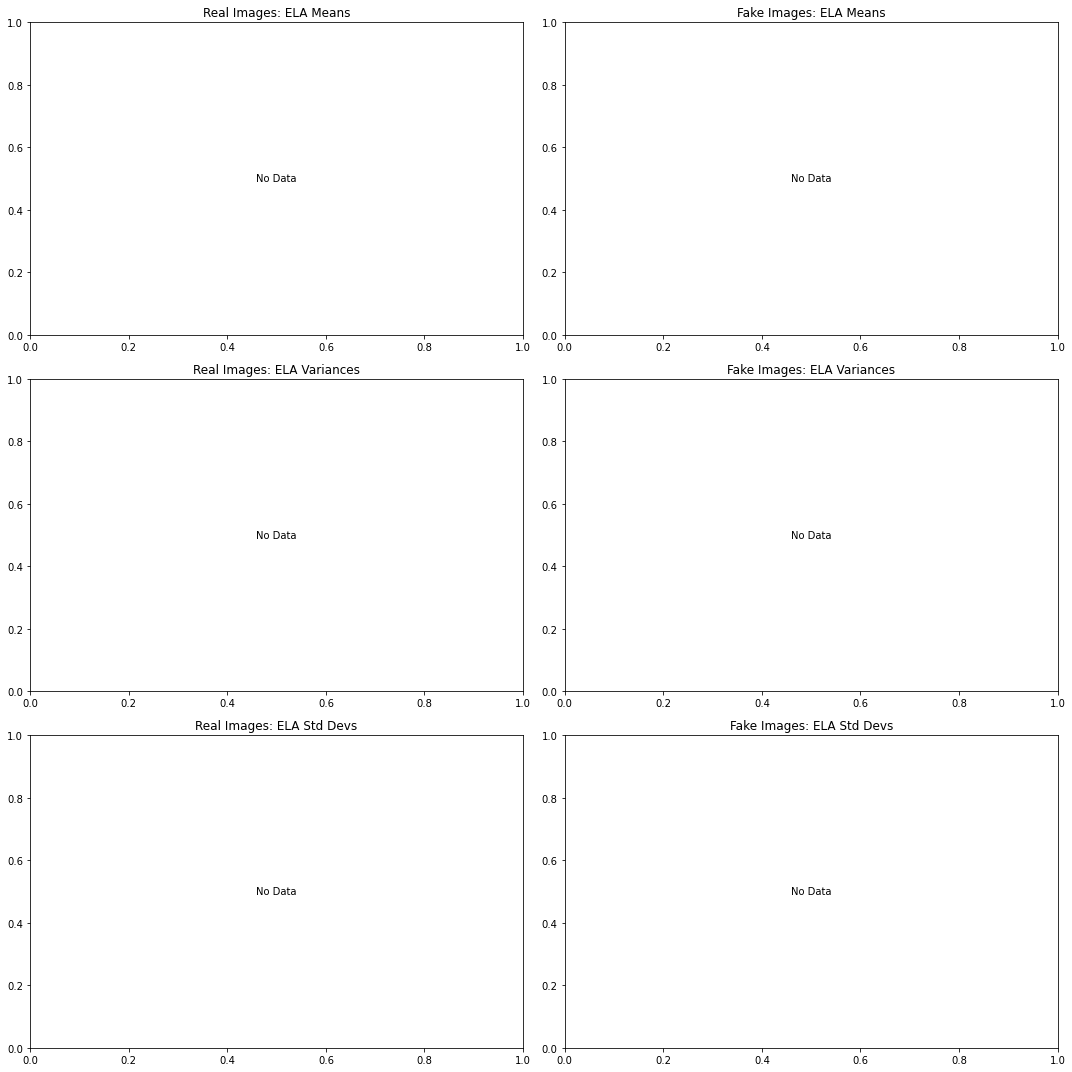

In [17]:
import os
import cv2
import numpy as np
from PIL import Image, ImageChops
import matplotlib.pyplot as plt

def calculate_ela_statistics(image_path):
    """
    Perform ELA analysis and calculate statistical properties of the ELA output.
    """
    try:
        # Open the original image and save it with reduced quality
        original = Image.open(image_path).convert("RGB")
        temp_path = "temp_ela_image.jpg"
        original.save(temp_path, "JPEG", quality=95)  # Lower quality for ELA

        # Open the recompressed image and compute ELA
        recompressed = Image.open(temp_path)
        ela_image = ImageChops.difference(original, recompressed)
        ela_array = np.asarray(ela_image, dtype=np.float32)

        # Calculate statistics
        mean = np.mean(ela_array)
        variance = np.var(ela_array)
        std_dev = np.std(ela_array)
        return mean, variance, std_dev
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None, None, None

def process_image_paths(image_paths):
    """Process a list of image paths and calculate ELA statistics."""
    means = []
    variances = []
    std_devs = []

    for path in image_paths:
        mean, variance, std_dev = calculate_ela_statistics(path)
        if mean is not None:
            means.append(mean)
            variances.append(variance)
            std_devs.append(std_dev)

    return means, variances, std_devs

# Populate with paths to real and fake images
train_real_image_paths = []  # Add paths to real images
train_fake_image_paths = []  # Add paths to fake images

# Calculate statistics for real and fake images
real_means, real_variances, real_std_devs = process_image_paths(train_real_image_paths)
fake_means, fake_variances, fake_std_devs = process_image_paths(train_fake_image_paths)

# Plot histograms for means, variances, and standard deviations
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Helper function to plot histograms
def plot_histogram(data, ax, title, color):
    if data:
        ax.hist(data, bins=min(30, len(data)), color=color, alpha=0.7)
    else:
        ax.text(0.5, 0.5, 'No Data', ha='center', va='center', transform=ax.transAxes)
    ax.set_title(title)

# Plot real and fake image statistics
plot_histogram(real_means, axes[0, 0], 'Real Images: ELA Means', 'blue')
plot_histogram(fake_means, axes[0, 1], 'Fake Images: ELA Means', 'red')

plot_histogram(real_variances, axes[1, 0], 'Real Images: ELA Variances', 'blue')
plot_histogram(fake_variances, axes[1, 1], 'Fake Images: ELA Variances', 'red')

plot_histogram(real_std_devs, axes[2, 0], 'Real Images: ELA Std Devs', 'blue')
plot_histogram(fake_std_devs, axes[2, 1], 'Fake Images: ELA Std Devs', 'red')

plt.tight_layout()
plt.show()


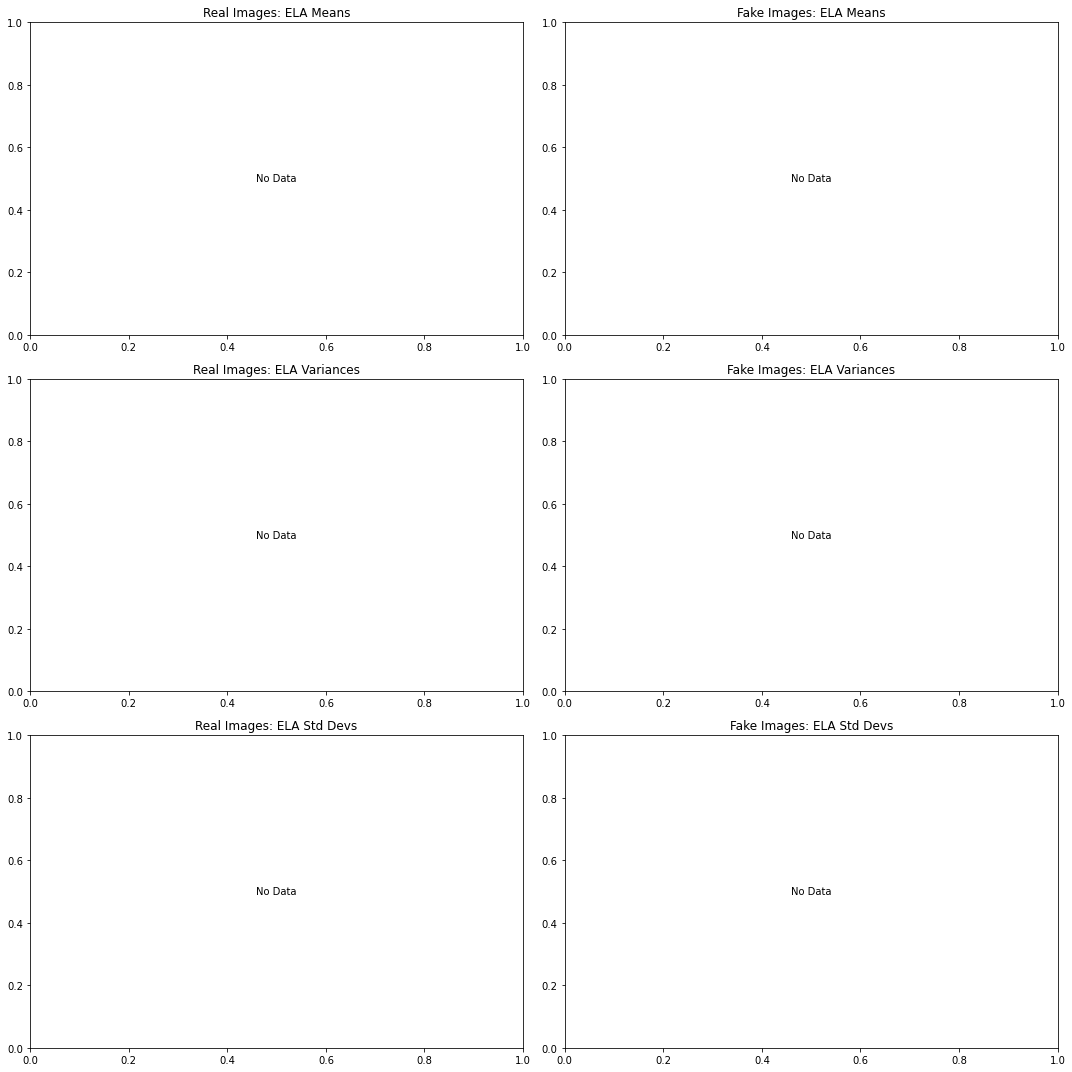

In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Paths to real and fake image datasets
train_real_image_paths = []  # Add paths to real images
train_fake_image_paths = []  # Add paths to fake images

def calculate_ela_statistics(image_paths):
    """Calculate ELA statistics (mean, variance, std dev) for a set of images."""
    means = []
    variances = []
    std_devs = []

    for path in image_paths:
        try:
            # Open original image and ensure it's in RGB format
            original = Image.open(path).convert('RGB')

            # Save a lower-quality version for ELA
            temp_path = "temp.jpg"
            original.save(temp_path, "JPEG", quality=90)
            ela_image = Image.open(temp_path).convert('RGB')

            # Calculate ELA array
            ela_array = np.abs(np.array(original, dtype=np.float32) - np.array(ela_image, dtype=np.float32))

            # Calculate statistics
            ela_mean = np.mean(ela_array)
            ela_var = np.var(ela_array)
            ela_std = np.std(ela_array)

            means.append(ela_mean)
            variances.append(ela_var)
            std_devs.append(ela_std)

            # Remove temporary file
            os.remove(temp_path)

        except Exception as e:
            print(f"Error processing {path}: {e}")

    return means, variances, std_devs

# Calculate statistics for real and fake images
real_means, real_variances, real_std_devs = calculate_ela_statistics(train_real_image_paths)
fake_means, fake_variances, fake_std_devs = calculate_ela_statistics(train_fake_image_paths)

# Plot histograms for means, variances, and standard deviations
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Helper function to handle empty data
def plot_histogram(data, ax, title, color):
    if data:
        ax.hist(data, bins=min(30, len(data)), color=color, alpha=0.7)
    else:
        ax.text(0.5, 0.5, 'No Data', ha='center', va='center', transform=ax.transAxes)
    ax.set_title(title)

plot_histogram(real_means, axes[0, 0], 'Real Images: ELA Means', 'blue')
plot_histogram(fake_means, axes[0, 1], 'Fake Images: ELA Means', 'red')

plot_histogram(real_variances, axes[1, 0], 'Real Images: ELA Variances', 'blue')
plot_histogram(fake_variances, axes[1, 1], 'Fake Images: ELA Variances', 'red')

plot_histogram(real_std_devs, axes[2, 0], 'Real Images: ELA Std Devs', 'blue')
plot_histogram(fake_std_devs, axes[2, 1], 'Fake Images: ELA Std Devs', 'red')

plt.tight_layout()
plt.show()


### Feature Engineering

In [19]:
### check missing values

missing_values = train_csv.isnull().sum()

missing_values

image    0
label    0
dtype: int64

In [20]:
### data cleaning

duplicates = train_csv[train_csv.duplicated()]

duplicates


,image,label


In [21]:
##### pytorch


/tmp/ipykernel_1634952/3289680429.py:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/home/joey/CIDAUT/model_output/run7/EfficientNetB0.p

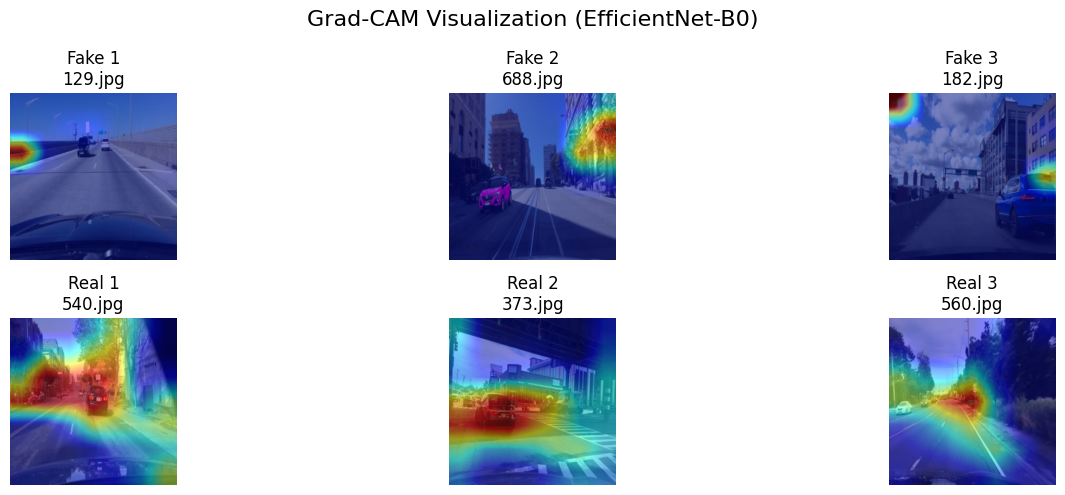

In [8]:
import torch
import torch.nn as nn
from torchvision import transforms
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Step 1: Load your custom EfficientNet-B0 model
class MyEfficientNetB0(nn.Module):
    def __init__(self, num_classes):
        super(MyEfficientNetB0, self).__init__()
        self.efficientnet = efficientnet_b0(weights=None)  # Initialize EfficientNet-B0 without pretrained weights
        self.efficientnet.classifier[1] = nn.Linear(self.efficientnet.classifier[1].in_features, num_classes)  # Adjust output layer

    def forward(self, x):
        return self.efficientnet(x)

# Instantiate your model
num_classes = 2  # Adjust based on your task (e.g., Fake and Real)
model = MyEfficientNetB0(num_classes=num_classes)

# Load the trained weights
# Load only the weights of the model to avoid the warning
model = efficientnet_b0(weights=None)  # Use weights=None to initialize without pre-trained weights
model.classifier = nn.Sequential(
    nn.Linear(model.classifier[1].in_features, 1),  # Match your training code
)
model.load_state_dict(torch.load("/home/joey/CIDAUT/model_output/run7/EfficientNetB0.pth"))
model.eval()  # Set the model to evaluation mode
checkpoint = torch.load("/home/joey/CIDAUT/model_output/run7/EfficientNetB0.pth")


# Step 2: Define the target layer
# For EfficientNet-B0, the last convolutional layer is 'features[-1]'
target_layer = model.features[-1]  # Access the last layer of the features Sequential module

# Step 3: Preprocessing
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),  # Adjust size based on EfficientNet's requirements
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Step 4: Grad-CAM visualization function
def apply_grad_cam(image_path, model, target_layer):
    # Load and preprocess the image
    image = Image.open(image_path).convert("RGB")
    input_tensor = preprocess(image).unsqueeze(0)  # Add batch dimension

    # Use Grad-CAM
    with GradCAM(model=model, target_layers=[target_layer]) as cam:
        # Predict class
        output = model(input_tensor)
        print(f"Raw model output: {output}")  # Print the raw output
        predicted_class = output.argmax().item()
        print(f"Predicted class for {image_path}: {predicted_class}")  # Print the predicted class

        # Generate Grad-CAM heatmap
        grayscale_cam = cam(input_tensor=input_tensor, targets=[ClassifierOutputTarget(predicted_class)])
        grayscale_cam = grayscale_cam[0, :]  # Remove batch dimension

    # Overlay Grad-CAM heatmap on the original image
    image_np = np.array(image.resize((224, 224))) / 255.0
    cam_image = show_cam_on_image(image_np, grayscale_cam, use_rgb=True)
    return cam_image


# Step 5: Visualize images with Grad-CAM and show image names
def visualize_images_with_grad_cam(base_path, model, target_layer, num_images_per_category=3):
    base_dir = Path(base_path)
    categories = ["Fake", "Real"]
    fig, axes = plt.subplots(len(categories), num_images_per_category, figsize=(15, 5))
    fig.suptitle("Grad-CAM Visualization (EfficientNet-B0)", fontsize=16)

    for i, category in enumerate(categories):
        category_path = base_dir / category
        image_files = list(category_path.glob("*.jpg")) + list(category_path.glob("*.png"))

        # Display a limited number of images per category
        images_to_show = min(len(image_files), num_images_per_category)
        for j in range(images_to_show):
            img_path = image_files[j]
            cam_image = apply_grad_cam(img_path, model, target_layer)
            ax = axes[i, j] if len(categories) > 1 else axes[j]
            ax.imshow(cam_image)
            ax.axis("off")
            # Show image name as the title
            ax.set_title(f"{category} {j+1}\n{img_path.name}")

    plt.tight_layout()
    plt.show()

# Provide the base path to the "Train_visualization" folder
base_path = "/home/joey/CIDAUT/Train_visualization"
visualize_images_with_grad_cam(base_path, model, target_layer)
